### PCA Analysis

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('data.csv', index_col=0)
scale = StandardScaler()

num = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
cat = data.drop(columns = num.columns)
num_scale = pd.DataFrame(scale.fit_transform(num), columns = num.columns, index = num.index)
df_mm = pd.concat([num_scale, cat], axis = 1)


X = num_scale
y = data['cat']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Text(0, 0.5, 'Variance Explained')

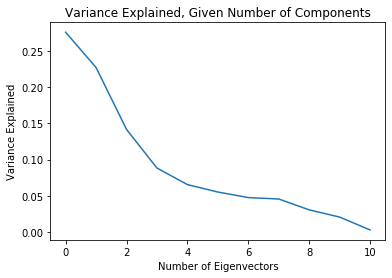

In [2]:
fit = PCA()
pca = fit.fit_transform(num_scale)
pca
plt.plot(fit.explained_variance_ratio_)
plt.title("Variance Explained, Given Number of Components")
plt.xlabel("Number of Eigenvectors")
plt.ylabel("Variance Explained")

In [3]:
pca = pd.DataFrame(pca)
pca.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,1.655121,0.059559,-0.514603,-0.429129,-0.268149,-0.015471
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0.848374,0.167670,-0.420952,-0.271032,-0.086832,0.054146
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,-0.713308,-0.851217,-0.929669,0.549410,0.116660,-0.103745
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,-0.227363,-0.325554,-0.567278,0.071229,-0.108046,0.027460


In [4]:
pca.rename(columns={0:'c1',1:'c2',2:'c3',3:'c4',4:'c5', 5:'c6', 6:'c7',7:'c8',8:'c9',9:'c10',10:'c11'}, inplace=True)

In [5]:
# Get First Five Columns
vects = fit.components_[:6]

In [6]:
components = ['one','two','three','four','five','six']
df = []
for component, i in zip(components, range(0,5)):
    component = pd.Series(vects[i], index=num_scale.columns)
    component.sort_values(ascending=False)
    df.append(component)
df = pd.DataFrame(df).T

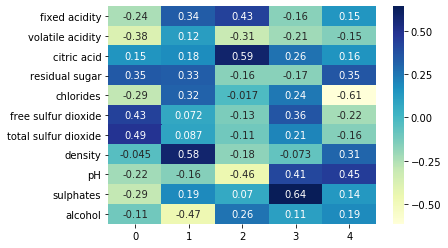

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df, annot=True, cmap="YlGnBu")

In [8]:
sort_c = []
for c in list(['c1','c2','c3','c4','c5','c6']):
    sort_pca = pca.sort_values(by=c)['quality'][:900].value_counts()
    sort_c.append(sort_pca)

KeyError: 'quality'

In [ ]:
df_sort = pd.DataFrame(sort_c).T

In [ ]:
df_sort

In [ ]:
sns.scatterplot("c1", "c2", hue = "quality", data = pca)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
sns.scatterplot("c1", "c5", hue = "quality", data = pca)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
### PCA from cookbook

In [ ]:
from data_processing import *

csv = 'data.csv'
d = data_clean(csv)

df_mm, num_scale = d.read_scale(csv)
X_train, X_test, y_train, y_test = d.split(csv)
X_train, X_test, y_train, y_test = d.index(csv)

X = num_scale
y = df_mm['cat']
df_mm = df_mm.drop(columns='type')

df_mm.groupby('cat').count()

In [ ]:
# Load libraries

from sklearn.decomposition import PCA


pca = PCA(n_components=0.99, whiten=True, svd_solver='full') # Conduct PCA 
features_pca = pca.fit_transform(df_mm)

print("Original number of features:", df_mm.shape[1]) 
print("Reduced number of features:", features_pca.shape[1]) 


In [ ]:
# Get First Five Columns

vects_pca = pca.components_[:6]

components = ['one','two','three','four','five']
df = []
for component, i in zip(components, range(0,5)):
    component = pd.Series(vects_pca[i], index=num_scale.columns)
    component.sort_values(ascending=False)
    df.append(component)
df = pd.DataFrame(df).T
df

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df, annot=True, cmap="YlGnBu")

### factorization attemtp

In [ ]:
from pca import *


In [9]:
from data_processing import *

csv = 'data.csv'
d = DataClean(csv)

df_mm, num_scale = d.read_scale(csv)

In [10]:
from pca import *
csv = 'data.csv'
target = 'cat'
p = PcaAnalysis(csv,target)

In [11]:
pca, features_df = p.pca_features(csv,target)

Original number of features: 11
Reduced number of features: 10


Original number of features: 11
Reduced number of features: 10


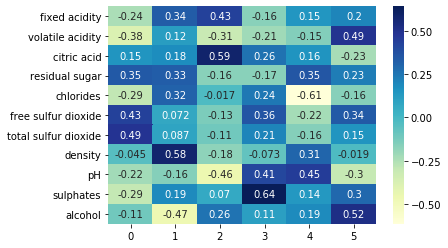

TypeError: cannot unpack non-iterable NoneType object

In [12]:
graph, df = p.get_components(csv,target,6)